## Your name & K-State Honor Code (Copy from the course syllabus and paste it here)

- David Meierer, Saurabh Singh, Carter Burkhart
- On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.


### Dataset Background

- This data set observed:
    - 5 video games (Battlefront 2, South Park, Assassins Creed Origins, Shadow of War, Destiny 2)
    
    
- Hashtags used were:
    - #assassinscreed, #shadowofwar, #destiny2, #southparkthefracturedbutwhole, #starwarsbattlefrontii
    
    
- After running the analysis we will be using 151,918 selected tweets
    

### Analytical Techniques Used

- For this analysis we used
    - Sentinment analysis
    - Hashtag frequenices
    - Word frequencies
    - Visualizations (word frequencies)

### Business Question
What is the best way to increase customer satisfaction and increase customer purchases of RPG categroy video games. 

In [71]:
#Importing Libraries

import json
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
% matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from collections import Counter
from sklearn import linear_model
from pattern.en import sentiment
from nltk.corpus import stopwords

import nltk
from nltk import FreqDist, word_tokenize

## Tweet Sample Analysis

In [2]:
# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('data/videogames.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print len(data)

317709


In [3]:
alltweets = []
for T in data:
    if 'text' in T:
        alltweets.append(T)
len(alltweets) 


tweets = []
for i in alltweets:
    if i['user']['lang'] == "en":
        tweets.append(i)  

In [4]:
#Data extraction
ids = [T['id_str'] for T in tweets]
times = [T['created_at'] for T in tweets]
texts = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]
names = [T['user']['name'] for T in tweets]
retweet_count = [T['retweet_count'] for T in tweets]
favorite_count = [T['favorite_count'] for T in tweets]
followers_count = [status['user']['followers_count'] for status in tweets if 'user' in status]
friends_count = [status['user']['friends_count'] for status in tweets if 'user' in status]       
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets]


hashtags = []


for tweet in texts:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        hashtags.append(['#'+i])

df = []

moviedata = zip(ids, texts, screen_names, names, followers_count, friends_count)
for row in moviedata:
    df.append(row)

df = pd.DataFrame(df)
df.columns = ['ID', 'Texts', 'Screen_Name', 'Name', 'Followers', 'Friends']
df.head()
df

,ID,Texts,Screen_Name,Name,Followers,Friends
0,930661614587609088,RT @therizzogp: Destiny 2? Destiny 2! We're ...,Taylor_Zell,Taylor Zell [TeEm],90,62
1,930661672091516930,https://t.co/o3XXVcZreh #gambling #disney #Sta...,jeremywayne19,Jeremy Wayne,8,0
2,930661685207162881,RT @JMatrix76: 📣 I'm live on #StarWarsBattlef...,AbbadonTank,Abbadon Tank 🕹🎮,486,608
3,930661730576994304,Hit 'em where it hurts with our selection of t...,VG247,VG247,227237,43
4,930661739259219968,Found this glourious propaganda poster on my S...,NickDiCo,Nick DiCo,1889,888
5,930661765070893056,RT @DaithiDeNogla: Get #AssassinsCreed https:/...,Deadly_Owl,DeadlyNightOwl,82,54
6,930661776068198400,RT @PAPIGFUNK: New Video- STAR WARS Battlefron...,YashMandalia,Yash Mandalia,33,158
7,930661791620743168,https://t.co/TaDS6Lquyy\n#Destiny2 #DeadOrbit ...,codyvasy,Thizz,123,754
8,930661820318322688,RT @RAZ0RFIST: GALE FORCE shitstorm imminent.....,Steerpike17,Clawfinger,47,381
9,930661830074048512,"RT @PhillyD: Unless all their responses are, “...",Cstorm1166,Carlos V,118,124


In [5]:
#Number of original retwwets
originaltweets = []

for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

59106

In [6]:
#Number of retweets
retweets_only = []

for tweet in texts:
    if 'rt @' in tweet.lower():
        retweets_only.append(tweet)
        
len(retweets_only)

151918

In [7]:
#ratio of original tweets to retweets

o = float(len(originaltweets))
r = float(len(retweets_only))

print o/r

0.38906515357


In [8]:
df['Texts'] = df.Texts.str.lower()
# find out original tweets & retweets
df['Retweets'] = df.Texts.str.startswith("rt")
# find hashtags and put them in a new column
df['Hashtags'] = df.Texts.str.findall(r"(?<=#)\w+") 
df.head()

,ID,Texts,Screen_Name,Name,Followers,Friends,Retweets,Hashtags
0,930661614587609088,rt @therizzogp: destiny 2? destiny 2! we're ...,Taylor_Zell,Taylor Zell [TeEm],90,62,True,[]
1,930661672091516930,https://t.co/o3xxvczreh #gambling #disney #sta...,jeremywayne19,Jeremy Wayne,8,0,False,"[gambling, disney, starwarsbattlefrontii]"
2,930661685207162881,rt @jmatrix76: 📣 i'm live on #starwarsbattlef...,AbbadonTank,Abbadon Tank 🕹🎮,486,608,True,"[starwarsbattlefrontii, wizebot, twitch]"
3,930661730576994304,hit 'em where it hurts with our selection of t...,VG247,VG247,227237,43,False,[destiny2]
4,930661739259219968,found this glourious propaganda poster on my s...,NickDiCo,Nick DiCo,1889,888,False,[starwarsbattlefrontii]


In [19]:
df2 = pd.DataFrame({
'screen_name': df['Screen_Name'].repeat(df['Hashtags'].str.len()),
'fol_count': df['Followers'].repeat(df['Hashtags'].str.len()),
'friend_count': df['Friends'].repeat(df['Hashtags'].str.len()),
'retweet': df['Retweets'].repeat(df['Hashtags'].str.len()),
'text': df['Texts'].repeat(df['Hashtags'].str.len()),
'hashtag': df['Hashtags'].sum()
})

df2.head(10)

,fol_count,friend_count,hashtag,retweet,screen_name,text
1,8,0,gambling,False,jeremywayne19,https://t.co/o3xxvczreh #gambling #disney #sta...
1,8,0,disney,False,jeremywayne19,https://t.co/o3xxvczreh #gambling #disney #sta...
1,8,0,starwarsbattlefrontii,False,jeremywayne19,https://t.co/o3xxvczreh #gambling #disney #sta...
2,486,608,starwarsbattlefrontii,True,AbbadonTank,rt @jmatrix76: 📣 i'm live on #starwarsbattlef...
2,486,608,wizebot,True,AbbadonTank,rt @jmatrix76: 📣 i'm live on #starwarsbattlef...
2,486,608,twitch,True,AbbadonTank,rt @jmatrix76: 📣 i'm live on #starwarsbattlef...
3,227237,43,destiny2,False,VG247,hit 'em where it hurts with our selection of t...
4,1889,888,starwarsbattlefrontii,False,NickDiCo,found this glourious propaganda poster on my s...
5,82,54,assassinscreed,True,Deadly_Owl,rt @daithidenogla: get #assassinscreed https:/...
5,82,54,ad,True,Deadly_Owl,rt @daithidenogla: get #assassinscreed https:/...


In [20]:
hashy = ['destiny2', 'assassinscreed', 'shadowofwar', 'southparkthefracturedbutwhole', 'starwarsbattlefrontii']
df2 = df2[df2['hashtag'].isin(hashy)]
df2.head()

,fol_count,friend_count,hashtag,retweet,screen_name,text
1,8,0,starwarsbattlefrontii,False,jeremywayne19,https://t.co/o3xxvczreh #gambling #disney #sta...
2,486,608,starwarsbattlefrontii,True,AbbadonTank,rt @jmatrix76: 📣 i'm live on #starwarsbattlef...
3,227237,43,destiny2,False,VG247,hit 'em where it hurts with our selection of t...
4,1889,888,starwarsbattlefrontii,False,NickDiCo,found this glourious propaganda poster on my s...
5,82,54,assassinscreed,True,Deadly_Owl,rt @daithidenogla: get #assassinscreed https:/...


In [21]:
#Get counts of game hashtags
cleanedHashtags = [val for sublist in hashtags for val in sublist]
encodedCleanedHashtags = []

finalHashtags = []
for i in cleanedHashtags:
    encodedCleanedHashtags.append(i.encode("utf-8"))

for i in encodedCleanedHashtags:
    finalHashtags.append(i)
    
cHashtags = Counter(finalHashtags)

hashtagCounts = []
for key in sorted(cHashtags.iterkeys()):
    hashtagCounts.append(cHashtags[key])
    
cHashtags

hashtagTotalCounts = []
for key in sorted(cHashtags.iterkeys()):
    hashtagTotalCounts.append(cHashtags[key])

cHashtags

Counter({'#truth': 2,
         '#smallstre': 1,
         '#ott': 5,
         '#gymday': 1,
         '#TheSmurfs': 1,
         '#NeverForget': 1,
         '#GOPTaxPlan': 4,
         '#destinyCAL': 1,
         '#ACShare': 1,
         '#Video': 2,
         '#Issues': 1,
         '#ShadyHiddenPractices': 1,
         '#BringCrayons': 2,
         '#Nioh': 9,
         '#buggy': 1,
         '#Suspicious': 1,
         '#starwarsfanprobz': 1,
         '#ezioauditore': 4,
         '#TwitchStreams': 1,
         '#starwras': 4,
         '#Hellyeah': 1,
         '#StrimPls': 2,
         '#IronBanana': 7,
         '#ANNUALNOOBHARVEST': 7,
         '#FiluxCDMX2017': 1,
         '#SentryModeEngaged': 1,
         '#teamgwtv': 2,
         '#lisboa': 1,
         '#Tw': 7,
         '#NotMyGame': 1,
         '#gamersheaven': 1,
         '#OfficialPartner': 2,
         '#Live': 172,
         '#lisbon': 1,
         '#LEGOMarvelSuperHeroes2': 9,
         '#Te': 3,
         '#newgamelive': 12,
         '#Destin

In [22]:
#Get the five most popular hashtags by hashtag counts
print cHashtags.most_common(20)

[('#StarWarsBattlefrontII', 88921), ('#Destiny2', 34845), ('#eSports', 11550), ('#EATitanJediSweepstakes', 9912), ('#Giveaway', 9412), ('#Monitor', 8983), ('#destiny2', 6911), ('#FreedomFamily', 5641), ('#Halloween', 5639), ('#hovacone', 5635), ('#giveaway', 5298), ('#twitch', 4878), ('#AssassinsCreed', 3849), ('#SouthParkTheFracturedButWhole', 3054), ('#PS4', 2775), ('#SupportSmallStreamers', 2678), ('#StarWars', 2350), ('#XboxOne', 2343), ('#12weeksofChristmas', 2259), ('#wizebot', 2012)]


In [23]:
#Get original users hashtags 
hashtagsOriginal = []

for tweet in originaltweets:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        hashtagsOriginal.append(['#'+i])

In [24]:
#Get counts of game hashtags for unique users
cleanedHashtagsOriginal = [val for sublist in hashtagsOriginal for val in sublist]
encodedCleanedHashtagsOriginal = []

finalHashtagsOriginal = []
for i in cleanedHashtagsOriginal:
    encodedCleanedHashtagsOriginal.append(i.encode("utf-8"))

for i in encodedCleanedHashtagsOriginal:
    finalHashtagsOriginal.append(i)
    
cHashtagsOriginal = Counter(finalHashtagsOriginal)


originalUserCounts = []
for key in sorted(cHashtagsOriginal.iterkeys()):
    originalUserCounts.append(cHashtagsOriginal[key])


cHashtagsOriginal

Counter({'#truth': 2,
         '#Wacom': 2,
         '#ott': 1,
         '#gymday': 1,
         '#TheSmurfs': 1,
         '#NeverForget': 1,
         '#GOPTaxPlan': 4,
         '#destinyCAL': 1,
         '#Video': 2,
         '#Issues': 1,
         '#ShadyHiddenPractices': 1,
         '#BringCrayons': 2,
         '#Nioh': 5,
         '#buggy': 1,
         '#Suspicious': 1,
         '#starwarsfanprobz': 1,
         '#ezioauditore': 3,
         '#TwitchStreams': 1,
         '#starwras': 4,
         '#Hellyeah': 1,
         '#StrimPls': 1,
         '#IronBanana': 5,
         '#ANNUALNOOBHARVEST': 1,
         '#FiluxCDMX2017': 1,
         '#SentryModeEngaged': 1,
         '#teamgwtv': 2,
         '#lisboa': 1,
         '#NotMyGame': 1,
         '#gamersheaven': 1,
         '#OfficialPartner': 2,
         '#Live': 55,
         '#lisbon': 1,
         '#LEGOMarvelSuperHeroes2': 4,
         '#newgamelive': 3,
         '#DestinyGuardian': 1,
         '#girlsoftwitch': 1,
         '#LiveEvent': 

In [25]:
#Get popular games based on hashtags for unique users
cHashtagsOriginal.most_common(20)

[('#Destiny2', 19381),
 ('#StarWarsBattlefrontII', 13094),
 ('#Giveaway', 8997),
 ('#Monitor', 8862),
 ('#eSports', 8862),
 ('#destiny2', 2356),
 ('#twitch', 1933),
 ('#AssassinsCreed', 1278),
 ('#giveaway', 1277),
 ('#PS4share', 1138),
 ('#wizebot', 953),
 ('#StarWars', 831),
 ('#gaming', 705),
 ('#Battlefront2', 664),
 ('#assassinscreed', 646),
 ('#EA', 616),
 ('#ShadowOfWar', 596),
 ('#EATitanJediSweepstakes', 593),
 ('#SupportSmallStreamers', 508),
 ('#PS4', 503)]

In [26]:
#Get hashtags of retweets to determine games
hashtagsRetweets = []

for tweet in retweets_only:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        hashtagsRetweets.append(['#'+i])

In [27]:
#Get counts of game hashtags for retweets 
cleanedHashtagsRetweets = [val for sublist in hashtagsRetweets for val in sublist]
encodedCleanedHashtagsRetweets = []

finalHashtagsRetweet = []
for i in cleanedHashtagsRetweets:
    encodedCleanedHashtagsRetweets.append(i.encode("utf-8"))

for i in encodedCleanedHashtagsRetweets:
    finalHashtagsRetweet.append(i)
    
cHashtagsRetweet = Counter(finalHashtagsRetweet)


retweetCounts = []
for key in sorted(cHashtagsRetweet.iterkeys()):
    retweetCounts.append(cHashtagsRetweet[key])

cHashtagsRetweet

Counter({'#smallstre': 1,
         '#Love': 7,
         '#StarwarsbattlefrontII': 42,
         '#TWiTCH': 1,
         '#AgentsofSHIELD': 1,
         '#StrangerThings2': 4,
         '#ott': 4,
         '#news24': 1,
         '#ACShare': 1,
         '#Thanksgiving': 65,
         '#Entertainment': 1,
         '#Nioh': 4,
         '#PlayStat': 1,
         '#bloodbowl': 1,
         '#ezioauditore': 1,
         '#killin': 2,
         '#StarWarsBattefrontII': 2,
         '#starwars': 156,
         '#StrimPls': 1,
         '#IronBanana': 2,
         '#ANNUALNOOBHARVEST': 6,
         '#GirlStreamers': 1,
         '#eathletes': 13,
         '#Tw': 7,
         '#boomtv': 1,
         '#Live': 117,
         '#gamin': 7,
         '#edmonton3dprints': 1,
         '#newgamelive': 9,
         '#DestinyGuardian': 2,
         '#AdrianAce': 1,
         '#TrialsOfTheNine': 8,
         '#Star': 6,
         '#CLUBapproved': 3,
         '#AgentsOfSHIELD': 4,
         '#WLO': 24,
         '#Vista': 1,
        

In [17]:
#Get popular games based on hashtags of retweets
cHashtagsRetweet.most_common(40)

[('#StarWarsBattlefrontII', 75827),
 ('#Destiny2', 15464),
 ('#EATitanJediSweepstakes', 9319),
 ('#FreedomFamily', 5631),
 ('#Halloween', 5627),
 ('#hovacone', 5626),
 ('#destiny2', 4555),
 ('#giveaway', 4021),
 ('#twitch', 2945),
 ('#SouthParkTheFracturedButWhole', 2789),
 ('#eSports', 2688),
 ('#AssassinsCreed', 2571),
 ('#PS4', 2272),
 ('#12weeksofChristmas', 2249),
 ('#SupportSmallStreamers', 2170),
 ('#XboxOne', 2052),
 ('#StarWars', 1519),
 ('#wizebot', 1059),
 ('#EA', 1006),
 ('#TeamEmmmmsie', 949),
 ('#ShadowOfWar', 922),
 ('#Twitch', 797),
 ('#GIVEAWAY', 680),
 ('#Battlefront2', 674),
 ('#AnimalCrossing', 652),
 ('#TwoTypesOfPeople', 651),
 ('#win', 548),
 ('#PlayStation', 524),
 ('#StarWarsBattleFrontII', 509),
 ('#NewMusicFriday', 482),
 ('#Limewax', 482),
 ('#dnb', 482),
 ('#AssassinsCreedOrigins', 464),
 ('#Xbox', 460),
 ('#CurseofOsiris', 421),
 ('#Giveaway', 415),
 ('#DaveProwse', 401),
 ('#PS4share', 384),
 ('#bungie', 363),
 ('#gaming', 345)]

In [18]:
#Look at texts to prepare for sentiment analysis

for i in texts[:5]:
    print i


RT @therizzogp: Destiny 2?  Destiny 2!  We're gonna do a test, will my internet hold out during streaming?  Let's find out.  Live i… 
https://t.co/o3XXVcZreh #gambling #disney #StarWarsBattlefrontII @EA @EAStarWars @Disney @RobertIger
RT @JMatrix76: 📣 I'm live on #StarWarsBattlefrontII !  https://t.co/WDqGs89fXG #wizebot #twitch
Hit 'em where it hurts with our selection of the 3 best swords in #Destiny2 https://t.co/Hy2xGQN6yJ https://t.co/gdpnzm9TE2
Found this glourious propaganda poster on my Star Tours on #StarWarsBattlefrontII Anyone want to translate? https://t.co/4Vtg6C57wc


#### Destiny 2 Sentiment

In [28]:
# Destiny 2 Sentiment Analysis
df_destiny = df2[df2['hashtag'] == "destiny2"]
df_destiny.head()

,fol_count,friend_count,hashtag,retweet,screen_name,text
3,227237,43,destiny2,False,VG247,hit 'em where it hurts with our selection of t...
7,123,754,destiny2,False,codyvasy,https://t.co/tads6lquyy\n#destiny2 #deadorbit ...
13,504,407,destiny2,False,NGG_PR,vg247: hit 'em where it hurts with our selecti...
15,1854,1746,destiny2,False,estefanyy000,"how sad that imma go to the lighthouse as a, ""..."
22,99,181,destiny2,False,Mc1Panda,"#destiny2 new player journal entry #0005, trip..."


In [29]:
# Get text column as a list
destiny_texts = df_destiny['text'].tolist()
destiny_texts

[u"hit 'em where it hurts with our selection of the 3 best swords in #destiny2 https://t.co/hy2xgqn6yj https://t.co/gdpnzm9te2",
 u'https://t.co/tads6lquyy\n#destiny2 #deadorbit #fallenhunter most my faction rally mischief',
 u"vg247: hit 'em where it hurts with our selection of the 3 best swords in #destiny2 https://t.co/8cmkmkhx2z https://t.co/to0iwmjy1f",
 u'how sad that imma go to the lighthouse as a, "loser." #destiny2 #destiny',
 u'#destiny2 new player journal entry #0005, trip mines are not just pretty licorice lines.\n\nmore like deadly twizzlers.',
 u'grenade launchers are trash. #destiny2',
 u"rt @jrkuervogaming: live in 20. it's been a awhile but i feel ready to play #supportsmallerstreamers\n#getweird #destiny2  @shoutgamers\u2026 ",
 u'damn!  dire promise is crispy on pc!!!!  \n\n#destiny2 #destiny2pc #bungie #supportsmallerstreamers #twitch #mixer\u2026 https://t.co/cxgfsqwuhp',
 u"i'm now streaming on twitch! playing battlefield hardline https://t.co/oqfbvbbea2 #destiny2

In [104]:
# Clean up the text information
# Remove useless numbers and alphanumerical words
destiny_texts1 = [re.sub("[^a-zA-Z]+", " ", doc) for doc in destiny_texts]
# tokenize
destiny_texts1 = [[word for word in doc.lower().split()] for doc in destiny_texts1]
# remove stopwords
more_stopwords = set(('destiny', 'https', 'come', 'going', 'check', 'right', 'playing', 'first', 'battlefront', 'teamemmmmsie','karlsanada','back','destinythegame','play','tonight', 'really', 'join', 'like','gaming','still','today','black','getting','fuck','shit'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
destiny_texts1 = [[word for word in text if word not in extra_stoplist] for text in destiny_texts1]
#remove short words
destiny_texts1 = [[ word for word in tokens if len(word) > 3 ] for tokens in destiny_texts1]

destiny_texts1

[[u'hurts', u'selection', u'best', u'swords', u'xgqn', u'gdpnzm'],
 [u'tads',
  u'lquyy',
  u'deadorbit',
  u'fallenhunter',
  u'faction',
  u'rally',
  u'mischief'],
 [u'hurts', u'selection', u'best', u'swords', u'cmkmkhx', u'iwmjy'],
 [u'imma', u'lighthouse', u'loser'],
 [u'player',
  u'journal',
  u'entry',
  u'trip',
  u'mines',
  u'pretty',
  u'licorice',
  u'lines',
  u'deadly',
  u'twizzlers'],
 [u'grenade', u'launchers', u'trash'],
 [u'jrkuervogaming',
  u'live',
  u'awhile',
  u'feel',
  u'ready',
  u'supportsmallerstreamers',
  u'getweird',
  u'shoutgamers'],
 [u'damn',
  u'dire',
  u'promise',
  u'crispy',
  u'bungie',
  u'supportsmallerstreamers',
  u'twitch',
  u'mixer',
  u'cxgfsqwuhp'],
 [u'streaming',
  u'twitch',
  u'battlefield',
  u'hardline',
  u'oqfbvbbea',
  u'digital',
  u'deluxe',
  u'edition',
  u'giveaway'],
 [u'macabrecupcake',
  u'welp',
  u'napped',
  u'night',
  u'feel',
  u'wolfenstein',
  u'soooo',
  u'gonna',
  u'grind'],
 [u'destinyguardian',
  u'titan

In [105]:
# Separate positive, negative, and neutral reviews
pos_text_d = []
neg_text_d = []
neu_text_d = []

for row in destiny_texts1:
    score = sentiment(row)
    if score[0] > 0:
        pos_text_d.append(row)
    elif score[0] == 0:
        neu_text_d.append(row)
    else:
        neg_text_d.append(row)
        
print len(pos_text_d), 'Positive'
print len(neg_text_d), 'Negative'
print len(neu_text_d), 'Neutral'
print len(destiny_texts1), 'Total'

11629 Positive
2399 Negative
27841 Neutral
41869 Total


In [106]:
# Positive Word Frequency
pos_text_d2 = [x for y in pos_text_d for x in y]
d_dist_pos = nltk.FreqDist(pos_text_d2)
d_dist_pos.most_common()

[(u'live', 5237),
 (u'twitch', 3016),
 (u'giveaway', 1495),
 (u'wizebot', 1367),
 (u'supportsmallstreamers', 923),
 (u'stream', 848),
 (u'bungie', 726),
 (u'starting', 643),
 (u'bright', 555),
 (u'playstation', 553),
 (u'iron', 529),
 (u'sale', 487),
 (u'awesome', 486),
 (u'spicy', 477),
 (u'eververse', 476),
 (u'emote', 476),
 (u'dust', 471),
 (u'ramen', 471),
 (u'saving', 470),
 (u'protip', 469),
 (u'banner', 461),
 (u'appeti', 461),
 (u'raid', 437),
 (u'aksweety', 435),
 (u'huge', 423),
 (u'thegamerscamp', 409),
 (u'good', 383),
 (u'time', 367),
 (u'osiris', 346),
 (u'gleam', 342),
 (u'nobrucpt', 340),
 (u'sweepstakes', 336),
 (u'curse', 278),
 (u'love', 273),
 (u'curseofosiris', 264),
 (u'edition', 260),
 (u'chill', 242),
 (u'hunter', 240),
 (u'deluxe', 239),
 (u'thanks', 238),
 (u'hang', 237),
 (u'enter', 235),
 (u'streaming', 227),
 (u'follow', 224),
 (u'digital', 224),
 (u'ironbanner', 217),
 (u'event', 213),
 (u'free', 206),
 (u'great', 200),
 (u'watch', 195),
 (u'grind', 193),

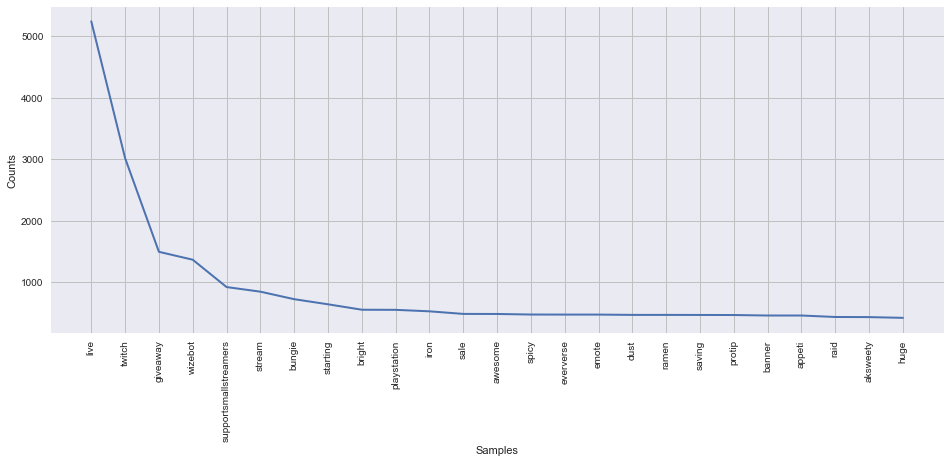

In [107]:
plt.figure(figsize=(16,6))
d_dist_pos.plot(25)

In [108]:
# Negative Word Frequency
neg_text_d2 = [x for y in neg_text_d for x in y]
d_dist_neg = nltk.FreqDist(neg_text_d2)
d_dist_neg.most_common()

[(u'game', 642),
 (u'live', 283),
 (u'bungie', 255),
 (u'stream', 187),
 (u'twitch', 183),
 (u'little', 148),
 (u'supportsmallstreamers', 132),
 (u'time', 118),
 (u'raid', 109),
 (u'late', 87),
 (u'giveaway', 87),
 (u'iron', 81),
 (u'banner', 79),
 (u'playstation', 69),
 (u'long', 69),
 (u'night', 67),
 (u'streaming', 67),
 (u'community', 65),
 (u'hate', 63),
 (u'need', 63),
 (u'video', 62),
 (u'small', 61),
 (u'ironbanner', 60),
 (u'hidden', 59),
 (u'people', 59),
 (u'never', 58),
 (u'bisgaming', 56),
 (u'random', 56),
 (u'friends', 56),
 (u'update', 55),
 (u'limited', 53),
 (u'outtro', 52),
 (u'hifj', 52),
 (u'sorry', 51),
 (u'share', 50),
 (u'osiris', 50),
 (u'know', 49),
 (u'trials', 48),
 (u'maybe', 47),
 (u'week', 47),
 (u'sick', 46),
 (u'even', 45),
 (u'level', 45),
 (u'take', 45),
 (u'hunter', 45),
 (u'mode', 45),
 (u'watch', 44),
 (u'kingkeoua', 43),
 (u'ever', 43),
 (u'evil', 43),
 (u'crucible', 43),
 (u'mercury', 42),
 (u'streamers', 42),
 (u'coming', 42),
 (u'grind', 42),
 

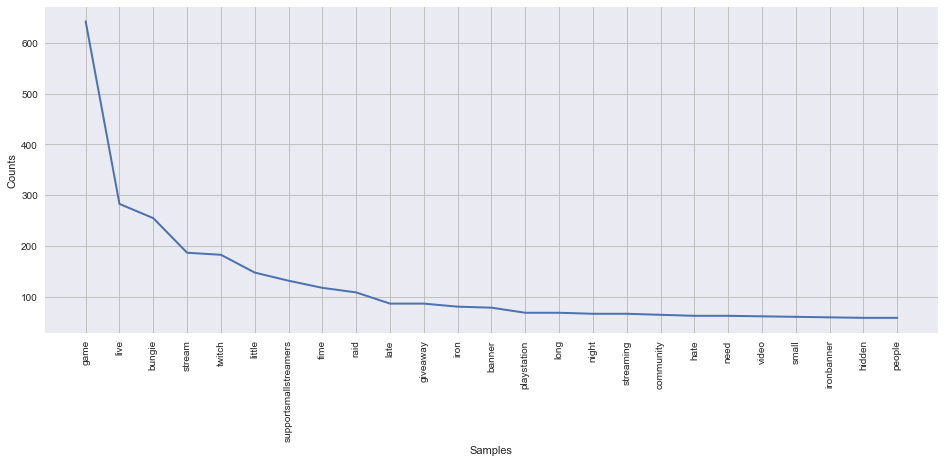

In [109]:
plt.figure(figsize=(16,6))
d_dist_neg.plot(25)

#### Assassin's Creed Sentiment Analysis

In [35]:
df_ac = df2[df2['hashtag'] == "assassinscreed"]
df_ac.head()

,fol_count,friend_count,hashtag,retweet,screen_name,text
5,82,54,assassinscreed,True,Deadly_Owl,rt @daithidenogla: get #assassinscreed https:/...
11,667,1546,assassinscreed,False,rock_streams,"more assassin's creed origins, live now! https..."
31,78,301,assassinscreed,True,big_p_the_mc,rt @ign: #assassinscreed​ released 10 years ag...
66,36,102,assassinscreed,True,xXyourAdopt3dXx,rt @gamespot: #assassinscreed celebrates its 1...
71,541,2404,assassinscreed,False,S12isLao,#twitch #livestreaming #assassinscreed #origin...


In [36]:
ac_texts = df_ac['text'].tolist()
ac_texts

[u'rt @daithidenogla: get #assassinscreed https://t.co/ed7c1m97vk! i loved playing it and i hope ye do too ^_^ @assassinscreed #ad',
 u"more assassin's creed origins, live now! https://t.co/09x2i1gqhm #twitch #twitchtv #assassinscreed https://t.co/1rsvcfahj2",
 u"rt @ign: #assassinscreed\u200b released 10 years ago today! what's your favorite assassin's creed game? https://t.co/uqb1gt8fiv",
 u'rt @gamespot: #assassinscreed celebrates its 10 year anniversary! which ac game is your favorite? https://t.co/mkotqe2ynz',
 u'#twitch #livestreaming #assassinscreed #origins https://t.co/r2fmyr3eft https://t.co/hs6cfo5ouq via @restreamio',
 u"rt @ign: #assassinscreed\u200b released 10 years ago today! what's your favorite assassin's creed game? https://t.co/uqb1gt8fiv",
 u'the papyrus riddles are freaking awesome via /r/assassinscreed https://t.co/k2kq33gc9v #assassinscreed',
 u'i just love when they interact. via /r/assassinscreed https://t.co/xtyhemheqm #assassinscreed',
 u'abubakar salem wasn

In [110]:
# Clean up the text information
# Remove useless numbers and alphanumerical words
ac_texts1 = [re.sub("[^a-zA-Z]+", " ", doc) for doc in ac_texts]
# tokenize
ac_texts1 = [[word for word in doc.lower().split()] for doc in ac_texts1]
# remove stopwords
more_stopwords = set(('assassinscreed','https','origins','game','ubisoft','dkki','today','assassins','acorigins','mkotqe','playing','including','presents','guang','black', 'animalcrossing','quorice','magnusbane','amarytha','abzybabzy','rinothebouncer','fuck','bring','played'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
ac_texts1 = [[word for word in text if word not in extra_stoplist] for text in ac_texts1]
#remove short words
ac_texts1 = [[ word for word in tokens if len(word) > 3 ] for tokens in ac_texts1]

ac_texts1

[[u'daithidenogla', u'loved', u'hope'],
 [u'assassin',
  u'creed',
  u'live',
  u'gqhm',
  u'twitch',
  u'twitchtv',
  u'rsvcfahj'],
 [u'released', u'years', u'favorite', u'assassin', u'creed'],
 [u'gamespot', u'celebrates', u'year', u'anniversary', u'favorite'],
 [u'twitch', u'livestreaming', u'fmyr', u'restreamio'],
 [u'released', u'years', u'favorite', u'assassin', u'creed'],
 [u'papyrus', u'riddles', u'freaking', u'awesome'],
 [u'love', u'interact', u'xtyhemheqm'],
 [u'abubakar',
  u'salem',
  u'even',
  u'nominated',
  u'best',
  u'performance',
  u'award',
  u'qxqc'],
 [u'xbox',
  u'chance',
  u'xboxonex',
  u'nopurchnec',
  u'ends',
  u'xboxsweepstakes',
  u'rules'],
 [u'gamespot', u'celebrates', u'year', u'anniversary', u'favorite'],
 [u'raphaellacoste',
  u'years',
  u'ride',
  u'time',
  u'goes',
  u'fast',
  u'assassinscreedorigins',
  u'years'],
 [u'streaming',
  u'tomorrow',
  u'morning',
  u'come',
  u'enjoy',
  u'show',
  u'twitchstream'],
 [u'nighthealer',
  u'periscope

In [111]:
# Separate positive, negative, and neutral reviews
pos_text_ac = []
neg_text_ac = []
neu_text_ac = []

for row in ac_texts1:
    score = sentiment(row)
    if score[0] > 0:
        pos_text_ac.append(row)
    elif score[0] == 0:
        neu_text_ac.append(row)
    else:
        neg_text_ac.append(row)
        
print len(pos_text_ac), 'Positive'
print len(neg_text_ac), 'Negative'
print len(neu_text_ac), 'Neutral'
print len(ac_texts1), 'Total'

1442 Positive
860 Negative
2498 Neutral
4800 Total


In [112]:
# Positive Word Frequency
pos_text_ac2 = [x for y in pos_text_ac for x in y]
ac_dist_pos = nltk.FreqDist(pos_text_ac2)
ac_dist_pos.most_common()

[(u'sobek', 191),
 (u'free', 183),
 (u'water', 181),
 (u'event', 181),
 (u'runs', 179),
 (u'best', 179),
 (u'face', 179),
 (u'fertility', 178),
 (u'work', 170),
 (u'creed', 163),
 (u'action', 150),
 (u'check', 149),
 (u'awesome', 148),
 (u'adventure', 145),
 (u'nominated', 144),
 (u'voting', 143),
 (u'honored', 143),
 (u'ends', 143),
 (u'assassin', 142),
 (u'fanartfriday', 134),
 (u'sent', 134),
 (u'live', 122),
 (u'favorite', 119),
 (u'years', 114),
 (u'thecodexnetwork', 106),
 (u'assassinscreedorigins', 99),
 (u'love', 78),
 (u'first', 61),
 (u'released', 59),
 (u'concept', 56),
 (u'twitch', 50),
 (u'share', 47),
 (u'anniversary', 46),
 (u'franchise', 42),
 (u'year', 41),
 (u'really', 40),
 (u'time', 37),
 (u'talented', 37),
 (u'latest', 36),
 (u'installment', 34),
 (u'gamespot', 32),
 (u'celebrates', 32),
 (u'full', 31),
 (u'come', 30),
 (u'artist', 29),
 (u'great', 28),
 (u'juno', 28),
 (u'gaming', 26),
 (u'issue', 26),
 (u'games', 25),
 (u'comic', 24),
 (u'would', 23),
 (u'amazing

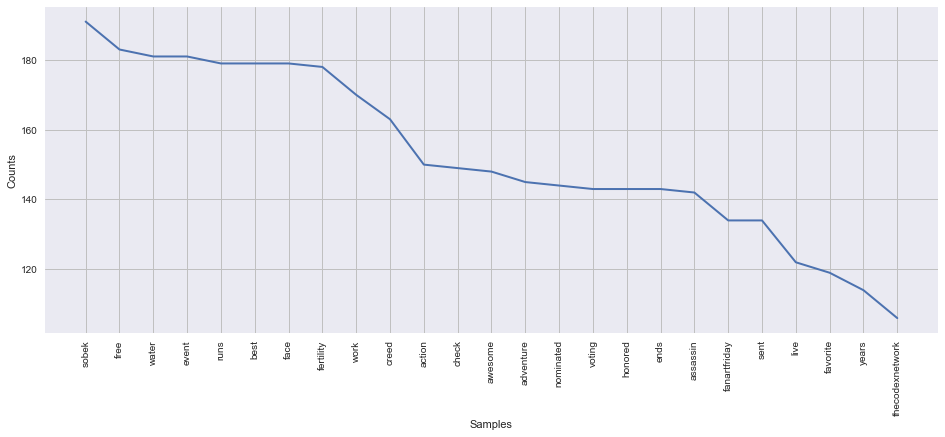

In [113]:
plt.figure(figsize=(16,6))
ac_dist_pos.plot(25)

In [114]:
# Negative Word Frequency
neg_text_ac2 = [x for y in neg_text_ac for x in y]
ac_dist_neg = nltk.FreqDist(neg_text_ac2)
ac_dist_neg.most_common()

[(u'started', 652),
 (u'confused', 652),
 (u'twotypesofpeople', 652),
 (u'initially', 652),
 (u'talking', 652),
 (u'share', 27),
 (u'bayek', 25),
 (u'think', 21),
 (u'dark', 20),
 (u'kidnapped', 19),
 (u'husband', 19),
 (u'assassinscreedorigins', 19),
 (u'supposed', 19),
 (u'level', 18),
 (u'high', 18),
 (u'raised', 18),
 (u'impossible', 18),
 (u'almost', 18),
 (u'creed', 15),
 (u'blade', 13),
 (u'hidden', 12),
 (u'dead', 11),
 (u'supportsmallstreamers', 9),
 (u'movie', 9),
 (u'assassin', 9),
 (u'circumstances', 7),
 (u'video', 7),
 (u'chaossoldier', 7),
 (u'explained', 7),
 (u'injury', 7),
 (u'ritual', 7),
 (u'kvchek', 7),
 (u'games', 7),
 (u'previously', 7),
 (u'life', 7),
 (u'conan', 7),
 (u'aaronrodgers', 7),
 (u'time', 7),
 (u'teamcoco', 6),
 (u'awful', 6),
 (u'weird', 6),
 (u'since', 5),
 (u'billy', 5),
 (u'fail', 5),
 (u'shirt', 5),
 (u'xbox', 5),
 (u'streaming', 5),
 (u'leap', 5),
 (u'abstergo', 5),
 (u'limited', 4),
 (u'sorry', 4),
 (u'egypt', 4),
 (u'live', 4),
 (u'hour', 4),

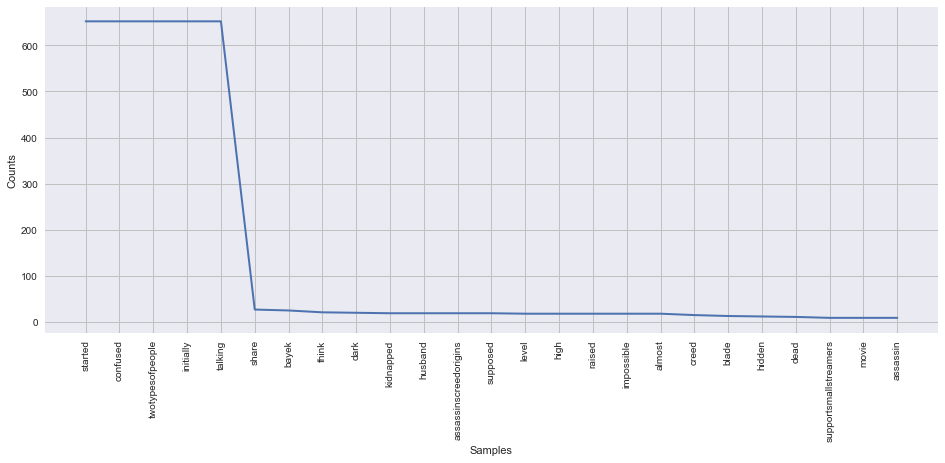

In [115]:
plt.figure(figsize=(16,6))
ac_dist_neg.plot(25)

#### Shadow of War Sentiment Analysis

In [39]:
df_sow = df2[df2['hashtag'] == "shadowofwar"]
df_sow.head()

,fol_count,friend_count,hashtag,retweet,screen_name,text
48,95,238,shadowofwar,False,darekB52,tomorrows vid may have some sexual undertones....
49,1886,2183,shadowofwar,True,ShoutGRT,rt @darekb52: tomorrows vid may have some sexu...
50,131687,558,shadowofwar,True,ShoutGamers,rt @darekb52: tomorrows vid may have some sexu...
111,5327,666,shadowofwar,False,diamondbiscutz,#shadowofwar #ps4share https://t.co/cai8tzxqgw
114,3166,339,shadowofwar,True,KarmaIngram1,rt @diamondbiscutz: #shadowofwar #ps4share ht...


In [40]:
sow_texts = df_sow['text'].tolist()
sow_texts

[u'tomorrows vid may have some sexual undertones....just a few.\n#shadowofwar #videogames @shoutgamers @shoutgrt \nps th\u2026 https://t.co/nuqpm5rf5a',
 u'rt @darekb52: tomorrows vid may have some sexual undertones....just a few.\n#shadowofwar #videogames @shoutgamers @shoutgrt \nps th\u2026 ',
 u'rt @darekb52: tomorrows vid may have some sexual undertones....just a few.\n#shadowofwar #videogames @shoutgamers @shoutgrt \nps th\u2026 ',
 u'#shadowofwar  #ps4share https://t.co/cai8tzxqgw',
 u'rt @diamondbiscutz: #shadowofwar  #ps4share https://t.co/cai8tzxqgw',
 u"@shadowofwargame had a blast, but now i need those expansion bits, y'all! #shadowofwar #expansionpass #ps4share https://t.co/h9vvrbplmm",
 u'gotta teach em how to wraith walk... #twitch #shadowofwar #supportsmallstreamers  https://t.co/uv04psm71b',
 u'#middleearth #shadowofwar #talion #wraith #execution #domination #fyreoptix #illfyreoptix\u2026 https://t.co/cmuhek9tuw',
 u'rt @lyssasauruss: gotta teach em how to wraith walk..

In [116]:
# Clean up the text information
# Remove useless numbers and alphanumerical words
sow_texts1 = [re.sub("[^a-zA-Z]+", " ", doc) for doc in sow_texts]
# tokenize
sow_texts1 = [[word for word in doc.lower().split()] for doc in sow_texts1]
# remove stopwords
more_stopwords = set(('shadowofwar','shadowofwargame','https','earth','middle','coming','year','today','included','meet','honmjc','ieuz','shadow','come','photo','going','next','join','first','friday','icymi','tuesday','preview','december','comment','weekend','copy','black','play','part','oumiafrz','hyperrts','going','tgoelite','late','night'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
sow_texts1 = [[word for word in text if word not in extra_stoplist] for text in sow_texts1]
#remove short words
sow_texts1 = [[ word for word in tokens if len(word) > 3 ] for tokens in sow_texts1]

sow_texts1

[[u'tomorrows',
  u'sexual',
  u'undertones',
  u'videogames',
  u'shoutgamers',
  u'shoutgrt',
  u'nuqpm'],
 [u'darekb',
  u'tomorrows',
  u'sexual',
  u'undertones',
  u'videogames',
  u'shoutgamers',
  u'shoutgrt'],
 [u'darekb',
  u'tomorrows',
  u'sexual',
  u'undertones',
  u'videogames',
  u'shoutgamers',
  u'shoutgrt'],
 [u'share', u'tzxqgw'],
 [u'diamondbiscutz', u'share', u'tzxqgw'],
 [u'blast',
  u'need',
  u'expansion',
  u'bits',
  u'expansionpass',
  u'share',
  u'vvrbplmm'],
 [u'gotta', u'teach', u'wraith', u'walk', u'twitch', u'supportsmallstreamers'],
 [u'middleearth',
  u'talion',
  u'wraith',
  u'execution',
  u'domination',
  u'fyreoptix',
  u'illfyreoptix',
  u'cmuhek'],
 [u'lyssasauruss',
  u'gotta',
  u'teach',
  u'wraith',
  u'walk',
  u'twitch',
  u'supportsmallstreamers'],
 [u'lyssasauruss',
  u'gotta',
  u'teach',
  u'wraith',
  u'walk',
  u'twitch',
  u'supportsmallstreamers'],
 [u'supakamengamu',
  u'voila',
  u'deuxi',
  u'pisode',
  u'podcast',
  u'parle',

In [117]:
# Separate positive, negative, and neutral reviews
pos_text_sow = []
neg_text_sow = []
neu_text_sow = []

for row in sow_texts1:
    score = sentiment(row)
    if score[0] > 0:
        pos_text_sow.append(row)
    elif score[0] == 0:
        neu_text_sow.append(row)
    else:
        neg_text_sow.append(row)
        
print len(pos_text_sow), 'Positive'
print len(neg_text_sow), 'Negative'
print len(neu_text_sow), 'Neutral'
print len(sow_texts1), 'Total'

870 Positive
166 Negative
919 Neutral
1955 Total


In [118]:
# Positive Word Frequency
pos_text_sow2 = [x for y in pos_text_sow for x in y]
sow_dist_pos = nltk.FreqDist(pos_text_sow2)
sow_dist_pos.most_common()

[(u'free', 309),
 (u'content', 278),
 (u'updates', 209),
 (u'look', 204),
 (u'features', 201),
 (u'live', 200),
 (u'stream', 103),
 (u'tribe', 89),
 (u'slaughter', 87),
 (u'twitch', 87),
 (u'watch', 78),
 (u'monolithdev', 75),
 (u'game', 58),
 (u'xbox', 55),
 (u'update', 54),
 (u'tune', 52),
 (u'unique', 46),
 (u'tribes', 46),
 (u'week', 42),
 (u'supportsmallstreamers', 38),
 (u'best', 37),
 (u'featuring', 30),
 (u'challenge', 29),
 (u'lord', 26),
 (u'community', 26),
 (u'complete', 26),
 (u'great', 23),
 (u'demonstration', 23),
 (u'bright', 23),
 (u'players', 23),
 (u'face', 22),
 (u'taken', 22),
 (u'november', 21),
 (u'shoutgamers', 20),
 (u'really', 19),
 (u'back', 19),
 (u'playthrough', 19),
 (u'frkna', 18),
 (u'sale', 18),
 (u'right', 18),
 (u'favorite', 18),
 (u'nemesis', 17),
 (u'love', 17),
 (u'playing', 17),
 (u'legendary', 17),
 (u'thanks', 17),
 (u'expansion', 17),
 (u'check', 17),
 (u'drop', 16),
 (u'mordor', 16),
 (u'gameplay', 15),
 (u'share', 15),
 (u'better', 15),
 (u'm

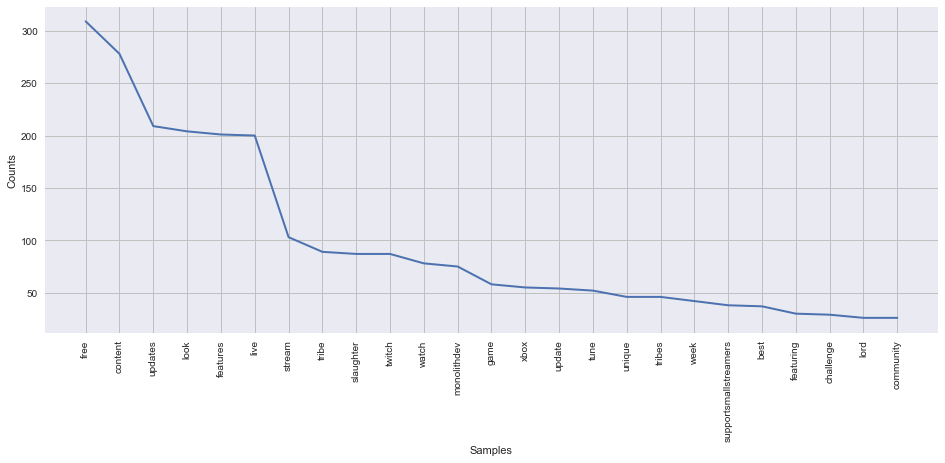

In [119]:
plt.figure(figsize=(16,6))
sow_dist_pos.plot(25)

In [120]:
# Negative Word Frequency
neg_text_sow2 = [x for y in neg_text_sow for x in y]
sow_dist_neg = nltk.FreqDist(neg_text_sow2)
sow_dist_neg.most_common()

[(u'game', 63),
 (u'mordor', 27),
 (u'tribe', 20),
 (u'walkthrough', 19),
 (u'slaughter', 19),
 (u'heart', 17),
 (u'faint', 17),
 (u'arriving', 17),
 (u'gamestop', 16),
 (u'brutal', 15),
 (u'supportsmallstreamers', 13),
 (u'challenge', 13),
 (u'shoutgamers', 13),
 (u'side', 13),
 (u'blind', 13),
 (u'unleash', 13),
 (u'community', 13),
 (u'complete', 13),
 (u'majorslack', 12),
 (u'playthrough', 12),
 (u'share', 7),
 (u'xbox', 7),
 (u'playing', 6),
 (u'damn', 6),
 (u'gaming', 6),
 (u'thoughts', 6),
 (u'long', 6),
 (u'stream', 5),
 (u'content', 5),
 (u'free', 5),
 (u'later', 5),
 (u'wolfenstein', 5),
 (u'xkhznu', 5),
 (u'also', 4),
 (u'orcs', 4),
 (u'stupid', 4),
 (u'like', 4),
 (u'people', 4),
 (u'time', 4),
 (u'sorry', 3),
 (u'worse', 3),
 (u'haalat', 3),
 (u'sauron', 3),
 (u'past', 3),
 (u'twitch', 3),
 (u'fuck', 3),
 (u'middleearth', 3),
 (u'guys', 3),
 (u'third', 3),
 (u'still', 3),
 (u'half', 3),
 (u'mode', 3),
 (u'iast', 3),
 (u'really', 3),
 (u'wearedxn', 3),
 (u'forgive', 3),
 (u

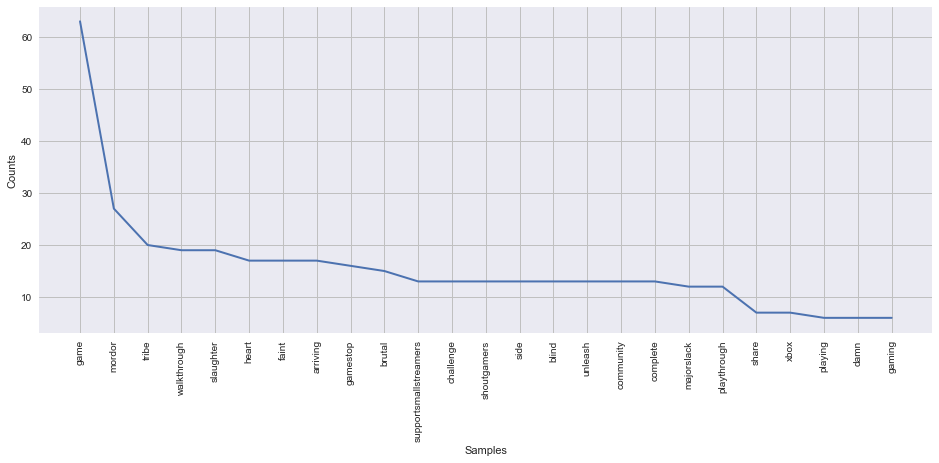

In [121]:
plt.figure(figsize=(16,6))
sow_dist_neg.plot(25)

#### South Park Sentiment Analysis

In [43]:
df_sp = df2[df2['hashtag'] == "southparkthefracturedbutwhole"]
df_sp.head()

,fol_count,friend_count,hashtag,retweet,screen_name,text
54,14,88,southparkthefracturedbutwhole,True,WierdFNAFLover,"rt @commu_backup: it's wonder tweek, champion ..."
127,29,4,southparkthefracturedbutwhole,True,NuLLocKGaming,rt @introvertlexy: another night of #southpark...
882,427,1090,southparkthefracturedbutwhole,False,adriianeut,all i want for #blackfriday is #tekken7 .\n......
1066,149,437,southparkthefracturedbutwhole,False,black_thron,#southparkthefracturedbutwhole is my pick for ...
1459,431,1683,southparkthefracturedbutwhole,False,WeaponXL_44,#southparkthefracturedbutwhole gets all the stars


In [44]:
sp_texts = df_sp['text'].tolist()
sp_texts

[u"rt @commu_backup: it's wonder tweek, champion of justice! #southpark #southparkthefracturedbutwhole https://t.co/uxbggbm5vy",
 u'rt @introvertlexy: another night of #southparkthefracturedbutwhole https://t.co/bttps0omzn #twitchstreamer #supportsmallstreams #twitchshar\u2026',
 u'all i want for #blackfriday is #tekken7 .\n...and #wolfenstein2 , and #southparkthefracturedbutwhole , and #horizonzerodawn , and- oh shit...',
 u'#southparkthefracturedbutwhole is my pick for best role playing game @thegameawards - live on december 7 https://t.co/facgsuhfhh',
 u'#southparkthefracturedbutwhole gets all the stars',
 u'art imitating life moment. playing #southparkthefracturedbutwhole demo while #fortnitebattleroyale updates. decided\u2026 https://t.co/vm0w6i1k2y',
 u'come watch @jennacloudtv as she plays #southparkthefracturedbutwhole on #twitch! https://t.co/j9x8nfhmty @twitchsharer @twitchasia',
 u'rt @kyroskoh5: come watch @jennacloudtv as she plays #southparkthefracturedbutwhole on #twitch

In [122]:
# Clean up the text information
# Remove useless numbers and alphanumerical words
sp_texts1 = [re.sub("[^a-zA-Z]+", " ", doc) for doc in sp_texts]
# tokenize
sp_texts1 = [[word for word in doc.lower().split()] for doc in sp_texts1]
# remove stopwords
more_stopwords = set(('hovacone','southparkthefracturedbutwhole','https','fractured','whole','freedomfamily','halloween','vwvazbq','zlklo','pnhg','obhejln','ebqfkzy','wmlx','yzhyk','vzcqr','qjux','southpark','south','park','twitchtv','nlvew','flowdriver','twitch','streamnati','ddkg','join','game','going','come','playing','check','tomorrow','livestream','vebo','smallyoutuber','wizebot','butwhole','shinobinando','cpae','xboxodesparadoo','kico','njctrihy','giveaway','fiskofficial','assassinscreedorigins','itpnooo','friend','pwease','usefulrobert','pxle','night','teamemmmmsie','monday','hibikistreams','today','orddyagvsj','southparkgame','playing','supportsmallstreamers','ufaxx','shit','india','katy','gonna'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
sp_texts1 = [[word for word in text if word not in extra_stoplist] for text in sp_texts1]
#remove short words
sp_texts1 = [[ word for word in tokens if len(word) > 3 ] for tokens in sp_texts1]

sp_texts1

[[u'commu',
  u'backup',
  u'wonder',
  u'tweek',
  u'champion',
  u'justice',
  u'uxbggbm'],
 [u'introvertlexy',
  u'another',
  u'bttps',
  u'omzn',
  u'twitchstreamer',
  u'supportsmallstreams',
  u'twitchshar'],
 [u'want', u'blackfriday', u'tekken', u'wolfenstein', u'horizonzerodawn'],
 [u'pick',
  u'best',
  u'role',
  u'thegameawards',
  u'live',
  u'december',
  u'facgsuhfhh'],
 [u'gets', u'stars'],
 [u'imitating',
  u'life',
  u'moment',
  u'demo',
  u'fortnitebattleroyale',
  u'updates',
  u'decided'],
 [u'watch',
  u'jennacloudtv',
  u'plays',
  u'nfhmty',
  u'twitchsharer',
  u'twitchasia'],
 [u'kyroskoh',
  u'watch',
  u'jennacloudtv',
  u'plays',
  u'nfhmty',
  u'twitchsharer',
  u'twit'],
 [u'kyroskoh',
  u'watch',
  u'jennacloudtv',
  u'plays',
  u'nfhmty',
  u'twitchsharer',
  u'twit'],
 [u'kyroskoh',
  u'watch',
  u'jennacloudtv',
  u'plays',
  u'nfhmty',
  u'twitchsharer',
  u'twit'],
 [u'kyroskoh',
  u'watch',
  u'jennacloudtv',
  u'plays',
  u'nfhmty',
  u'twitchsha

In [123]:
# Separate positive, negative, and neutral reviews
pos_text_sp = []
neg_text_sp = []
neu_text_sp = []

for row in sp_texts1:
    score = sentiment(row)
    if score[0] > 0:
        pos_text_sp.append(row)
    elif score[0] == 0:
        neu_text_sp.append(row)
    else:
        neg_text_sp.append(row)
        
print len(pos_text_sp), 'Positive'
print len(neg_text_sp), 'Negative'
print len(neu_text_sp), 'Neutral'
print len(sp_texts1), 'Total'

230 Positive
47 Negative
2820 Neutral
3097 Total


In [124]:
# Positive Word Frequency
pos_text_sp2 = [x for y in pos_text_sp for x in y]
sp_dist_pos = nltk.FreqDist(pos_text_sp2)
sp_dist_pos.most_common()

[(u'live', 131),
 (u'nlevw', 36),
 (u'time', 23),
 (u'love', 18),
 (u'stream', 17),
 (u'need', 12),
 (u'hype', 11),
 (u'streaming', 11),
 (u'good', 10),
 (u'chill', 9),
 (u'happy', 9),
 (u'xboxodesperadoo', 8),
 (u'power', 8),
 (u'wait', 7),
 (u'play', 7),
 (u'epilogue', 7),
 (u'jokes', 7),
 (u'laugh', 7),
 (u'evening', 7),
 (u'ready', 7),
 (u'right', 7),
 (u'back', 7),
 (u'share', 6),
 (u'better', 6),
 (u'tonight', 6),
 (u'mrdjsilva', 6),
 (u'sure', 6),
 (u'falcaxtwitch', 6),
 (u'youtube', 6),
 (u'peterkingdom', 5),
 (u'laughs', 5),
 (u'think', 5),
 (u'powerful', 5),
 (u'fight', 5),
 (u'part', 5),
 (u'inappropriate', 5),
 (u'many', 5),
 (u'platinum', 5),
 (u'streamersalliance', 5),
 (u'make', 5),
 (u'blackfriday', 5),
 (u'starting', 5),
 (u'unbvcswrmw', 5),
 (u'great', 4),
 (u'missildineyt', 4),
 (u'zvrcqmlvjr', 4),
 (u'free', 4),
 (u'philiprodham', 4),
 (u'first', 4),
 (u'butt', 4),
 (u'stop', 4),
 (u'morning', 4),
 (u'best', 4),
 (u'kyle', 4),
 (u'bmholguecc', 4),
 (u'sevaskyr', 4),

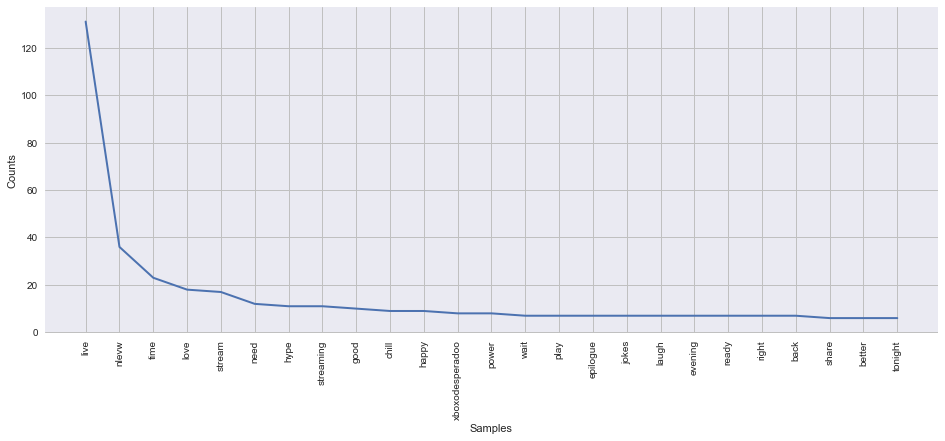

In [125]:
plt.figure(figsize=(16,6))
sp_dist_pos.plot(25)

In [126]:
# Negative Word Frequency
neg_text_sp2 = [x for y in neg_text_sp for x in y]
sp_dist_neg = nltk.FreqDist(neg_text_sp2)
sp_dist_neg.most_common()

[(u'long', 22),
 (u'watch', 20),
 (u'video', 20),
 (u'posted', 20),
 (u'uagf', 4),
 (u'creepy', 4),
 (u'time', 4),
 (u'trudging', 3),
 (u'realcr', 3),
 (u'hungover', 3),
 (u'weird', 3),
 (u'little', 3),
 (u'prepare', 3),
 (u'fight', 3),
 (u'slowly', 3),
 (u'stream', 3),
 (u'fuck', 3),
 (u'find', 2),
 (u'enough', 2),
 (u'lets', 2),
 (u'black', 2),
 (u'master', 2),
 (u'first', 2),
 (u'head', 2),
 (u'woycr', 2),
 (u'evil', 2),
 (u'starting', 2),
 (u'least', 1),
 (u'fnytxgcuf', 1),
 (u'ilovegaam', 1),
 (u'nicky', 1),
 (u'pasjdykh', 1),
 (u'less', 1),
 (u'character', 1),
 (u'late', 1),
 (u'mysterion', 1),
 (u'freeman', 1),
 (u'return', 1),
 (u'watching', 1),
 (u'nearly', 1),
 (u'eplt', 1),
 (u'like', 1),
 (u'instore', 1),
 (u'item', 1),
 (u'small', 1),
 (u'shocking', 1),
 (u'xfodmlw', 1),
 (u'house', 1),
 (u'katyhearthstone', 1),
 (u'back', 1),
 (u'computer', 1),
 (u'download', 1),
 (u'aysn', 1),
 (u'ggtb', 1),
 (u'said', 1),
 (u'giving', 1),
 (u'chaos', 1),
 (u'wearable', 1),
 (u'everythin

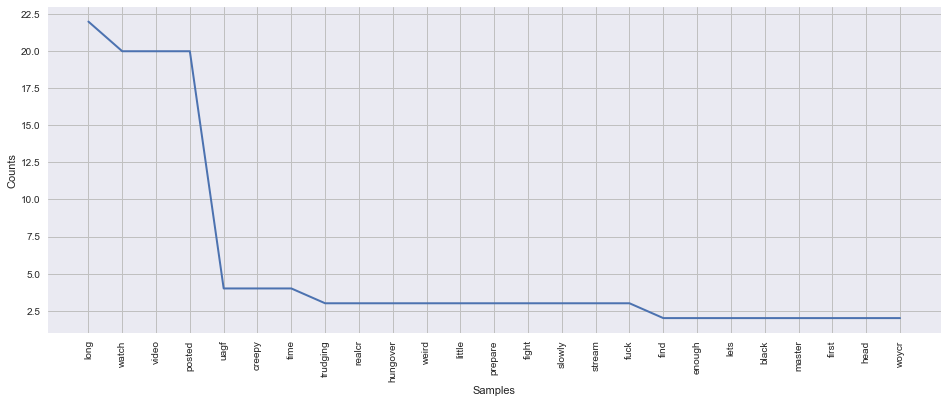

In [127]:
plt.figure(figsize=(16,6))
sp_dist_neg.plot(25)

#### Star Wars Sentiment Analysis

In [47]:
df_sw = df2[df2['hashtag'] == "starwarsbattlefrontii"]
df_sw.head()

,fol_count,friend_count,hashtag,retweet,screen_name,text
1,8,0,starwarsbattlefrontii,False,jeremywayne19,https://t.co/o3xxvczreh #gambling #disney #sta...
2,486,608,starwarsbattlefrontii,True,AbbadonTank,rt @jmatrix76: 📣 i'm live on #starwarsbattlef...
4,1889,888,starwarsbattlefrontii,False,NickDiCo,found this glourious propaganda poster on my s...
10,32,41,starwarsbattlefrontii,False,Darkatron,@watchmixer \nwhat time is @johnboyega going l...
12,550,2340,starwarsbattlefrontii,False,ZElawar,"""the dark side courses through #starwarsbattle..."


In [48]:
sw_texts = df_sw['text'].tolist()
sw_texts

[u'https://t.co/o3xxvczreh #gambling #disney #starwarsbattlefrontii @ea @eastarwars @disney @robertiger',
 u"rt @jmatrix76: \U0001f4e3 i'm live on #starwarsbattlefrontii !  https://t.co/wdqgs89fxg #wizebot #twitch",
 u'found this glourious propaganda poster on my star tours on #starwarsbattlefrontii anyone want to translate? https://t.co/4vtg6c57wc',
 u'@watchmixer \nwhat time is @johnboyega going live tomorrow on @eastarwars #starwarsbattlefrontii ?\n\nand what time is\u2026 https://t.co/utjnuq2f8s',
 u'"the dark side courses through #starwarsbattlefrontii, playing mind tricks on gamers to spend more money to become\u2026 https://t.co/jbl745scsq',
 u'rt @prometheus50k: do you miss lucasarts? \n\n#starwarsbattlefrontii #starwars #ea',
 u'so,kayaus and kratos have been able to play #starwarsbattlefrontii all day and i\'m still getting "you\'re too early"\u2026 https://t.co/albhxmwgck',
 u"so i bought and started playing #starwarsbattlefrontii earlier and i'm impressed. still getting use

In [128]:
# Clean up the text information
# Remove useless numbers and alphanumerical words
sw_texts1 = [re.sub("[^a-zA-Z]+", " ", doc) for doc in sw_texts]
# tokenize
sw_texts1 = [[word for word in doc.lower().split()] for doc in sw_texts1]
# remove stopwords
more_stopwords = set(('starwarsbattlefrontii','https','enter','code','away','giving','giveaway','copy','free','digital','next','popular','weeksofchristmas','robeyonekenobi','picked','available','mrprowestie','starwars','today','stream','another','chooses','theflickpick','still','twitch','much','playing','battlefront','watch','coming','play','player','turned','built','scufgaming','enter','away','richstone','follow','star','know','holiday','heard','season','brother','besadon','wars','apparently'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
sw_texts1 = [[word for word in text if word not in extra_stoplist] for text in sw_texts1]
#remove short words
sw_texts1 = [[ word for word in tokens if len(word) > 3 ] for tokens in sw_texts1]

sw_texts1

[[u'xxvczreh',
  u'gambling',
  u'disney',
  u'eastarwars',
  u'disney',
  u'robertiger'],
 [u'jmatrix', u'live', u'wdqgs', u'wizebot'],
 [u'found',
  u'glourious',
  u'propaganda',
  u'poster',
  u'tours',
  u'anyone',
  u'want',
  u'translate'],
 [u'watchmixer',
  u'time',
  u'johnboyega',
  u'going',
  u'live',
  u'tomorrow',
  u'eastarwars',
  u'time',
  u'utjnuq'],
 [u'dark',
  u'side',
  u'courses',
  u'mind',
  u'tricks',
  u'gamers',
  u'spend',
  u'money',
  u'become',
  u'scsq'],
 [u'prometheus', u'miss', u'lucasarts'],
 [u'kayaus', u'kratos', u'able', u'getting', u'early', u'albhxmwgck'],
 [u'bought',
  u'started',
  u'earlier',
  u'impressed',
  u'getting',
  u'controls',
  u'igplffd'],
 [u'prometheus', u'miss', u'lucasarts'],
 [u'would', u'like', u'point', u'would', u'reason', u'purchase'],
 [u'kukuruyo', u'xgjis', u'bxhq', u'electronicarts'],
 [u'live', u'living', u'force', u'jcfmish', u'twitchtv'],
 [u'australia',
  u'become',
  u'hero',
  u'galaxy',
  u'needs',
  u'arri

In [129]:
# Separate positive, negative, and neutral reviews
pos_text_sw = []
neg_text_sw = []
neu_text_sw = []

for row in sw_texts1:
    score = sentiment(row)
    if score[0] > 0:
        pos_text_sw.append(row)
    elif score[0] == 0:
        neu_text_sw.append(row)
    else:
        neg_text_sw.append(row)
        
print len(pos_text_sw), 'Positive'
print len(neg_text_sw), 'Negative'
print len(neu_text_sw), 'Neutral'
print len(sw_texts1), 'Total'

16979 Positive
26547 Negative
46785 Neutral
90311 Total


In [130]:
# Positive Word Frequency
pos_text_sw2 = [x for y in pos_text_sw for x in y]
sw_dist_pos = nltk.FreqDist(pos_text_sw2)
sw_dist_pos.most_common()

[(u'deluxe', 3515),
 (u'live', 3317),
 (u'winner', 2808),
 (u'edition', 2776),
 (u'eastarwars', 2077),
 (u'massivenetwork', 1779),
 (u'xboxone', 1752),
 (u'good', 1402),
 (u'xbox', 1191),
 (u'time', 1172),
 (u'thanks', 1169),
 (u'chance', 799),
 (u'campaign', 701),
 (u'experience', 675),
 (u'gaming', 661),
 (u'watching', 572),
 (u'clear', 571),
 (u'drama', 571),
 (u'future', 569),
 (u'industry', 567),
 (u'everybody', 561),
 (u'unfold', 560),
 (u'outra', 559),
 (u'adrianchm', 558),
 (u'microtransactions', 526),
 (u'game', 517),
 (u'first', 512),
 (u'come', 498),
 (u'perfect', 476),
 (u'finally', 468),
 (u'statement', 465),
 (u'official', 462),
 (u'bfcaptures', 457),
 (u'addressing', 442),
 (u'agentbizzle', 442),
 (u'bigge', 442),
 (u'found', 434),
 (u'storm', 433),
 (u'awesome', 428),
 (u'silver', 427),
 (u'acceptable', 425),
 (u'culturally', 424),
 (u'lining', 424),
 (u'mombot', 423),
 (u'removed', 407),
 (u'real', 404),
 (u'content', 402),
 (u'enjoy', 400),
 (u'running', 392),
 (u'vic

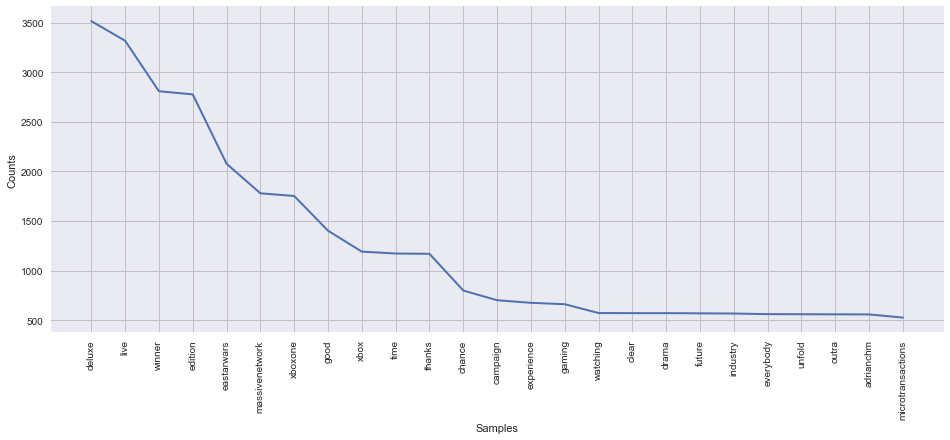

In [131]:
plt.figure(figsize=(16,6))
sw_dist_pos.plot(25)

In [132]:
# Negative Word Frequency
neg_text_sw2 = [x for y in neg_text_sw for x in y]
sw_dist_neg = nltk.FreqDist(neg_text_sw2)
sw_dist_neg.most_common()

[(u'game', 35302),
 (u'eastarwars', 17128),
 (u'purchases', 15494),
 (u'input', 15352),
 (u'side', 3422),
 (u'dark', 3378),
 (u'force', 3180),
 (u'path', 3162),
 (u'awakened', 3162),
 (u'given', 1852),
 (u'single', 702),
 (u'story', 633),
 (u'iden', 625),
 (u'versio', 618),
 (u'resurrection', 598),
 (u'returns', 597),
 (u'chapters', 596),
 (u'launch', 526),
 (u'worldwide', 511),
 (u'full', 500),
 (u'looking', 499),
 (u'celebrate', 491),
 (u'xisvkpoos', 469),
 (u'micro', 348),
 (u'transactions', 340),
 (u'chance', 336),
 (u'little', 264),
 (u'necessary', 214),
 (u'sinks', 212),
 (u'component', 212),
 (u'elytorresauthor', 208),
 (u'long', 204),
 (u'going', 201),
 (u'time', 193),
 (u'microtransactions', 171),
 (u'come', 158),
 (u'heavy', 146),
 (u'learned', 139),
 (u'video', 128),
 (u'breathing', 126),
 (u'loot', 125),
 (u'buqj', 124),
 (u'campaign', 123),
 (u'pics', 122),
 (u'johneeca', 122),
 (u'live', 121),
 (u'temporarily', 121),
 (u'rises', 121),
 (u'removed', 113),
 (u'hate', 111),


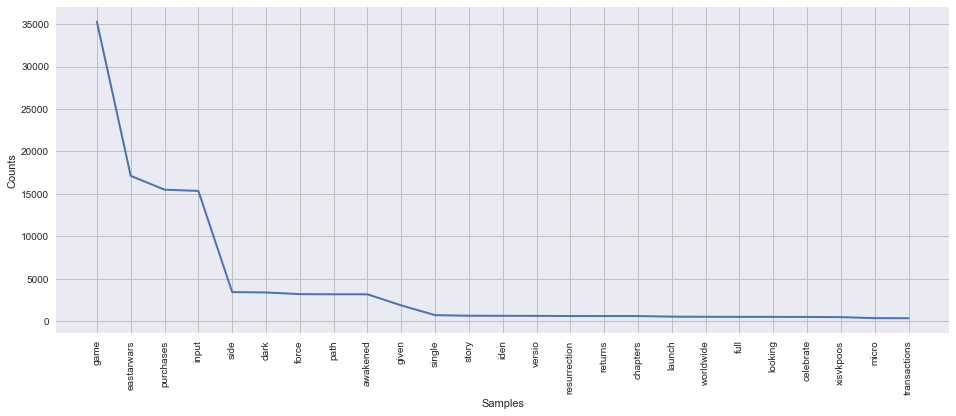

In [133]:
plt.figure(figsize=(16,6))
sw_dist_neg.plot(25)